## 결정 트리

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target)

In [6]:
dtc = DecisionTreeClassifier()
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

 ### Setting - MAC
 1. brew install graphviz
 2. (Conda or Main) pip install graphviz

In [9]:
export_graphviz(dtc, out_file="tree.dot", class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True)

In [10]:
import graphviz


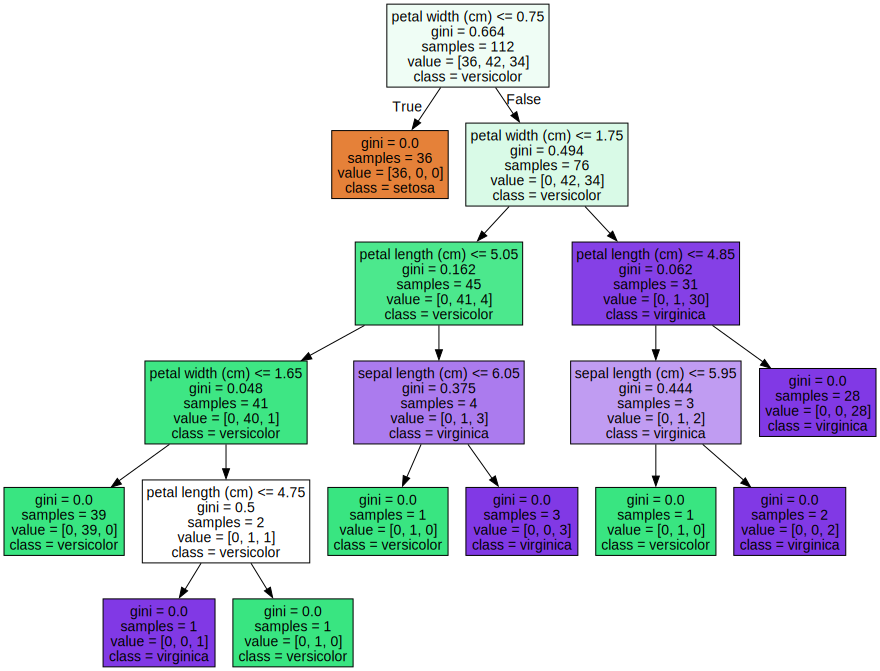

In [11]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 트리 설명
1. samples: 전체 데이터 개수
2. value: 데이터 구성 / [36, 42, 34]는 Setosa 36개, Versicolor 42개, Virginica 34개로 구성됨을 의미
3. sample 112개가 value = [36, 42, 34] 분포도로 되어 있으므로 지니 계수는 0.664
4. petal length (cm) <= 0.75 규칙으로 자식 노드 생성
5. class = Versicolor는 하위 노드를 가질 경우에 Versicolor의 개수가 42개로 가장 많다는 것을 의미

### 지니 계수

In [28]:
import gini2

print(gini2.gini2([33,40,39]))
print(gini2.gini2([36,42,34]))

0.6643813775510204
0.6639030612244898


### max_depth

In [15]:
dtc = DecisionTreeClassifier(max_depth=3)
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
export_graphviz(dtc, out_file="max_depth_cla.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True)

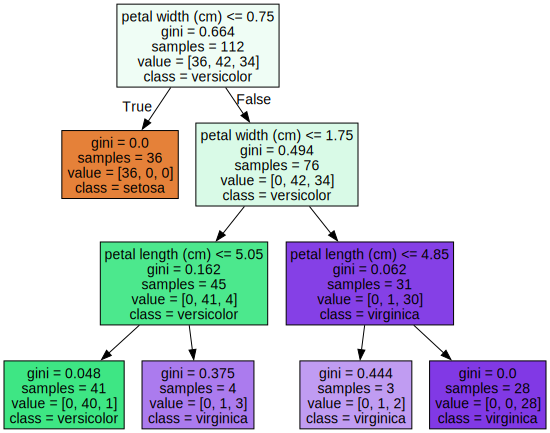

In [17]:
with open("max_depth_cla.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [12]:
export_graphviz(dtc, out_file="max_depth.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True, max_depth=3)

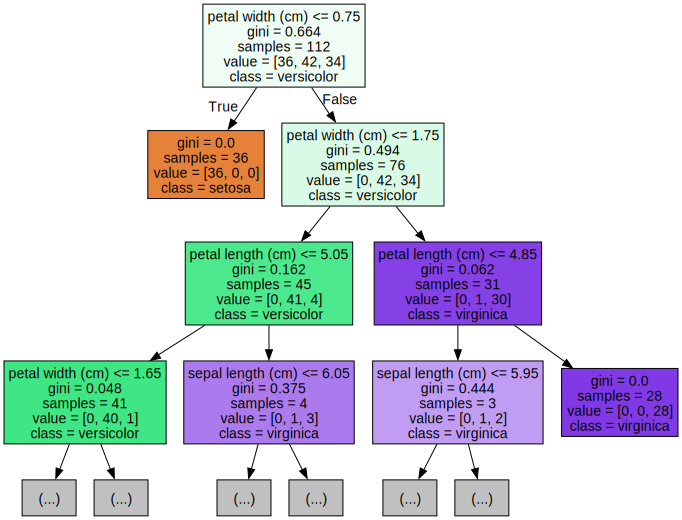

In [13]:
with open("max_depth.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### min_samples_split

In [18]:
dtc = DecisionTreeClassifier(min_samples_split=4)
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=4)

In [19]:
export_graphviz(dtc, out_file="min_samples_split.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True)

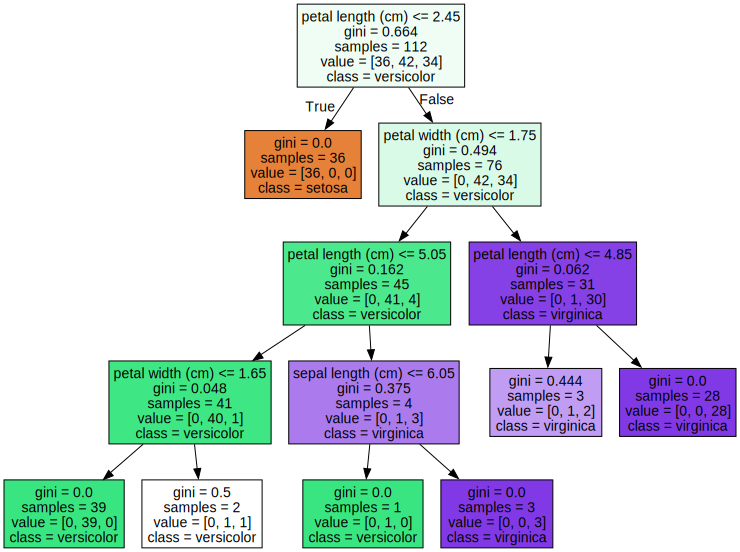

In [20]:
with open("min_samples_split.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### min_samples_leaf
#### 노드가 분할할 경우 Left, Right의 child 중 하나라도 min_sample_leafs로 지정된 최소 데이터 건수보다 더 작은 샘플 데이터 건수를 가지면, 해당 노드는 더 이상 문할하지 않고 리프 노트로 변환

In [21]:
dtc = DecisionTreeClassifier(min_samples_leaf=4)
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4)

In [22]:
export_graphviz(dtc, out_file="min_samples_leaf.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True)

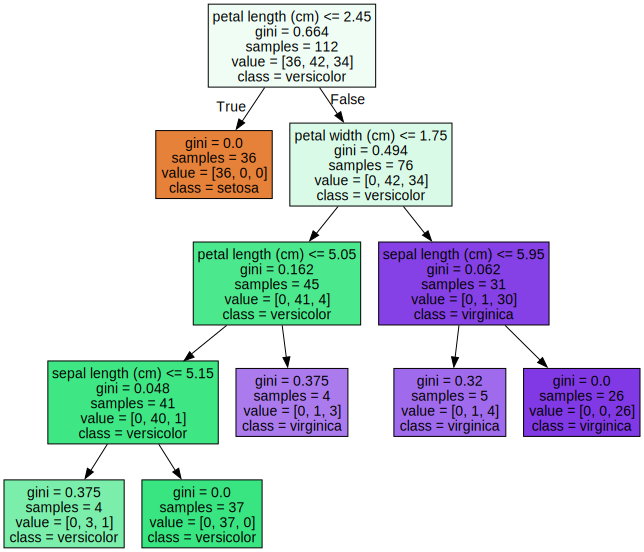

In [23]:
with open("min_samples_leaf.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance

In [30]:
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dtc.feature_importances_, 3)))

Feature importances:
[0.011 0.    0.582 0.406]


In [31]:
# feature별 importance mapping
for name, value in zip(iris_data.feature_names, dtc.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.011
sepal width (cm) : 0.000
petal length (cm) : 0.582
petal width (cm) : 0.406


<Axes: >

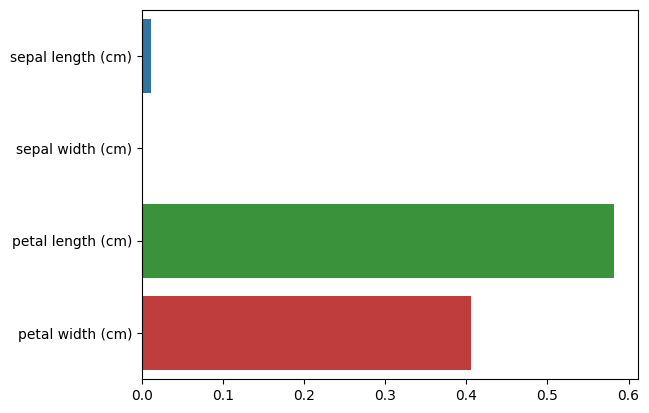

In [33]:
sns.barplot(x=dtc.feature_importances_, y = iris_data.feature_names)

In [34]:
# 여러 features 중 petal_length가 가장 피처 중요도가 높음을 알 수 있음

## 결정 트리 과적합(Overfitting)

In [35]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

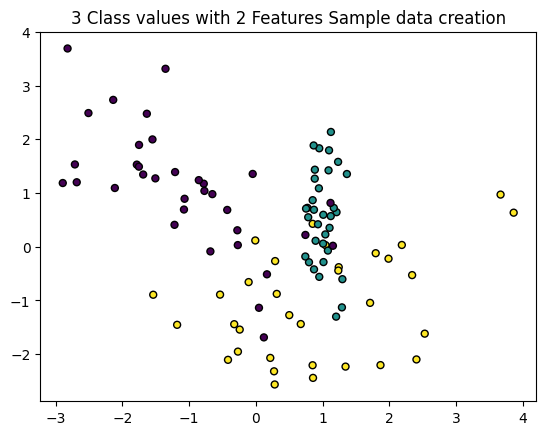

In [37]:
plt.title("3 Class values with 2 Features Sample data creation")

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                            n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')